# Índice

- [Integrity](#Integrity)
- [Basic Information](#Basic-Information)
- [Contribution](#Contribution)
- [Background and Motivation](#Background-and-Motivation)
- [Project Architecture](#Project-Architecture)
- [Data](#Data)
- [Ethical Considerations](#Ethical-Considerations)
- [Data Processing](#Data-Processing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Machine Learning](#Machine-Learning)
- [Model Evaluation](#Model-Evaluation)
- [Retrieval Augmented Generation](#Retrieval-Augmented-Generation)

# Integrity

Eu, Pedro Diogo Pires Rodrigues, estudante com o número de inscrição 13600 de/o 2º Ciclo em Engenharia
Informática da Universidade da Beira Interior, declaro ter desenvolvido o presente
trabalho e elaborado o presente texto em total consonância com o Código de Integridade
da Universidade da Beira Interior. Mais concretamente afirmo não ter incorrido em
qualquer das variedades de Fraude Académica, e que aqui declaro conhecer, que em
particular atendi à exigida referenciação de frases, extratos, imagens e outras formas de
trabalho intelectual, e assumindo assim na íntegra as responsabilidades da autoria.
Universidade da Beira Interior, Covilhã
04/06/2024

Eu, Lucas Teixeira Rocha, estudante com o número de inscrição 11813 de/o 2º Ciclo em Engenharia Informática da Universidade da Beira Interior, declaro ter desenvolvido o presente trabalho e elaborado o presente texto em total consonância com o Código de Integridade da Universidade da Beira Interior. Mais concretamente afirmo não ter incorrido em qualquer das variedades de Fraude Académica, e que aqui declaro conhecer, que em particular atendi à exigida referenciação de frases, extratos, imagens e outras formas de trabalho intelectual, e assumindo assim na íntegra as responsabilidades da autoria.
Universidade da Beira Interior, Covilhã
04/06/2024

Eu, José Morais, estudante com o número de inscrição 13736 de/o 2º Ciclo em Engenharia Informática da Universidade da Beira Interior, declaro ter desenvolvido o presente trabalho e elaborado o presente texto em total consonância com o Código de Integridade da Universidade da Beira Interior. Mais concretamente afirmo não ter incorrido em qualquer das variedades de Fraude Académica, e que aqui declaro conhecer, que em particular atendi à exigida referenciação de frases, extratos, imagens e outras formas de trabalho intelectual, e assumindo assim na íntegra as responsabilidades da autoria.
Universidade da Beira Interior, Covilhã
04/06/2024

# Basic Information

**Título do Projeto** Nível de satisfação dos informáticos em Portugal 

**Nome do repositório Github** MEI_CD_20232024_Grupo7

**Informação dos Autores**
- Pedro Rodrigues; M13600; pedrodiogop
- José Morais; M13736; josemorai
- Lucas Rocha; M11813; lucascudo

# Contribution

A realização do trabalho foi feita com as tarefas divididas um pouco por todos, sendo que grande parte do planeamento inicial, estruturação do dataset e pesquisas iniciais para o desenvolvimento do projeto foram relaizados pelos membros José Morais e Pedro Rodrigues, assim como a elaboração da documentação, dispendendo cerca de 24 horas na elaboração destes aspetos todos. A implementação do código foi feita na sua maioridade pelo membro do grupo Lucas Rocha, que implementou a codificação de Web Scrapping, Data Cleaning, Data Analysis e Data Visualization, pelo que passou cerca de 26 horas na implementação, também com assistêcia dos restantes membros.

# Background and Motivation

O mercado de trabalho apresenta uma vasta gama de empregos, nas mais diversas áreas, como informática, industrias têxteis, automóveis. Cada índividuo deve ingressar neste mercado para possuir independencia financeira e poder ter um sustento. A escolha de trabalho de cada um pode advir de um número de fatores, como por exemplo escolhas com base nas suas capacidades, educação, familia, entre outros aspetos que podem influencias a sua decisão na escolha de um trabalho. Mas acima de tudo, toda a gente procura um equilibrio entre trabalho e conforto, que seja no ambiente empresarial como de salário. Com a aplicação de técnicas lecionadas durante o semestre, este trabalho visa dar um estudo acerca da satisfação das pessoas num leque de diferentes empresas, de modo a que as pessoas consigam ter uma decisão mais informada acerca do trabalho onde podem vir a ingressar, e assim escolher a opção que lhes permite ter uma maior qualidade de vida.

A ideia surgiu com base no nosso contexto atual, visto sermos alunos de mestrado e embreve iremos nós também ingressar no mundo de trabalho em breve. Sendo uma experiência nova, e juntando o útil ao agradável, achamos pertinente fazer um estudo acerca deste tópico, para termos uma decisão mais ponderada para o nosso futuro, que responde ás questões "Qual a melhor empresa para mim?, Em que empresa se vê um melhor ambiente de trabalho?

# Project Architecture

A arquitetura deste trabalho conta com o auxilio de um número de bibliotecas que cotêm as funções necessárias para a implementação das tarefas que são necessárias para a concretização da solução final. Começando pela obtenção dos dados, o Web Scrapping é feito recorrendo a requests URL usando a biblioteca do mesmo nome. Ao aceder aos dados do site, são então formatados recorrendo ao Beautifull Soup, que transforma os dados HTML para um formato que pode ser guardado posteriormente num Pandas Dataframe. Com isto, podemos então guardar os dados num ficheiro CSV, onde este passo constitui a construção do nosso Dataset.

A partir daqui, podemos então começar a tratar dos dados, novamente recorrendo ao Pandas Dataframe. Aqui vai-se fazer a limpeza de dados redundantes, valores nulos, colunas inexistentes, etc. Com os dados devidamente formatados e limpos, podemos então aplicar o uso de MatPlit Lib para fazer as representações estatisticas dos dados recolhidos, como histogrammas, scatter plots, para poder ter uma representação visual acerca dos dados e facilitar a análise de modo a responder ás questões que foram impostas no ínicio do projeto.

Por fim, usamos a biblioteca de SKLearn para poder executar imputações com base num modelo de previsão que usa o método do Gradiente Descendente, com o objetivo de prever a faixa salarial e a média salarial para as instâncias onde estes valores não constam ou estão em null.

Todas as bibliotecas encontram-se explicitas no código em baixo.

Descreva a arquitetura do seu projeto fazendo referência às
bibliotecas e ao software usado. Pode recorrer à elaboração de imagens.

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import concurrent.futures
import requests
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import KFold, train_test_split
import numpy as np
import os
import openai
from dotenv import load_dotenv

# Data

## Fonte dos Dados


A obtenção de dados foi feita a partir do website "Teamlyzer". Este website apresenta várias reviews dos  trabalhadores e ex-trabalhadores de diversas empresas. Com base nas reviews dos trabalhadores, este website disponibiliza vários dados das empresas, tais como salário, modo de trabalho, equilíbrio entre trabalho e vida pessoal, reconhecimento e recompensa, qualidade de gestão, oportunidades de carreira, entre outros.

## Processo de Obtenção dos Dados

Com o objetivo de avaliar as empresas de Portugal, consideramos os dados disponíveis neste website suficientes para a realização do trabalho. Foi realizado web scraping a página https://pt.teamlyzer.com/companies/remote-companies e a página de cada empresa do Teamlyzer.


## Modo de Obtenção dos Dados

A obtenção dos dados foi realizada de forma organizada, utilizando funções específicas para cada ação. Foram também usadas threads e tratamento de exceções para garantir uma extração de dados eficaz e eficiente. Os dados foram armazenados num ficheiro CSV, onde cada instância corresponde a uma empresa com as devidas características.

## Estrutura dos Dados

Os dados recolhidos incluem:

Características Básicas da Empresa:
- URL: Endereço da página da empresa no Teamlyzer.
- Nome: Nome da empresa.
- Website: Endereço do website oficial da empresa.
- Descrição: Breve descrição da empresa.
- Quantidade de Colaboradores: Número de colaboradores na empresa.
- Indústria: Setor de atuação da empresa.
- Faixa Salarial: Média salarial na empresa.
- Número de horas trabalhadas em média: Média das horas trabalhadas na empresa.
- Modo de Trabalho: Tipo de trabalho (remoto, híbrido, escritório, etc.).

Avaliações:
- Avaliação: Avaliação geral da empresa.
- Pior Avaliação: Pior avaliação recebida.
- Melhor Avaliação: Melhor avaliação recebida.
- Quantidade de Avaliações: Número total de avaliações.
- Quantidade de Resenhas: Número total de resenhas.

Avaliações Específicas:
- Equilíbrio Trabalho/Vida Pessoal: Avaliação do equilíbrio entre trabalho e vida pessoal.
- Reconhecimento e Recompensa: Avaliação do reconhecimento e recompensa na empresa.
- Salário: Avaliação do salário oferecido pela empresa.
- Qualidade de Gestão: Avaliação da qualidade da gestão da empresa.
- Oportunidades de Carreira: Avaliação das oportunidades de carreira na empresa.
- Dificuldade das Entrevistas: Avaliação da dificuldade das entrevistas na empresa.
- Taxa de Recomendação: Percentagem de recomendação da empresa pelos trabalhadores.
- Índice de Dificuldade das Entrevistas: Índice de dificuldade das entrevistas.
- Taxa de Feedback das Entrevistas: Percentagem de feedback recebido após entrevistas.
- Investimento de Tempo em Entrevistas: Tempo médio investido em entrevistas.


## Código

A função get_company_details extrai detalhes de uma empresa a partir de uma URL fornecida.
A função faz uma requisição HTTP à página da empresa, em seguida usa a função extract_details_from_page e extract_work_mode para obter informações detalhadas da empresa e adiciona esses detalhes ao dicionário details.

In [2]:
def get_company_details(company_url):
    details = {}
    try:
        response = requests.get(company_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        if response.status_code > 299 or not soup:
            raise Exception(f'Erro HTTP {response.status_code}')
        details = {'URL': company_url, **extract_details_from_page(soup, company_url)}
    except Exception as e:
        print(f'\nFalha na extracão de {company_url}: {str(e)}')
    return details

A função extract_details_from_page obtêm as características de cada empresa a partir da sua página inicial e obtem o modo de trabalho da empresa a partir do URL da pagina da empresa + '/benefits-and-values'.

In [3]:
def extract_details_from_page(soup, company_url):
    details = {}
    
    aggregated_rating_meta_fields = [
        ['Nome', 'name'],
        ['Website', 'sameAs'],
        ['Descrição', 'description'],
        ['Qtde. Colaboradores', 'numberOfEmployees'],
        ['Avaliação', 'ratingValue'],
        ['Pior Avaliação', 'worstRating'],
        ['Melhor Avaliação', 'bestRating'],
        ['Qtde. Avaliações', 'ratingCount'],
        ['Qtde. Resenhas', 'reviewCount']
    ]
    for field in aggregated_rating_meta_fields:
        try:
            details[field[0]] = soup.find('meta', itemprop=field[1])['content']
        except:
            details[field[0]] = None
            
    try:
        details['Indústria'] = soup.find('div', class_='company_add_details').find('a').text.strip()
    except:
        details['Indústria'] = None

    rating_fields = ['Equilíbrio trabalho/vida pessoal', 'Reconhecimento e recompensa', 'Salário',
            'Qualidade de gestão', 'Oportunidades de carreira', 'Dificuldade das entrevistas']
    ratings = soup.find_all('div', class_='progress progress-xs')
    for idx, field in enumerate(rating_fields):
        try:
            details[field] = int(float(ratings[idx].find('div', class_='progress-bar')['data-transitiongoal']))
        except:
            details[field] = None

    review_fields = ['Taxa de recomendação', 'Faixa salarial', 'Nº de horas trabalhadas em média',
                     'Índice de dificuldade das entrevistas','Taxa de feedback das entrevistas',
                     'Investimento de tempo em entrevistas']
    reviews = [r.find('p', class_='size-h2').text.strip() for r in soup.find_all('div', class_='box-info')]
    for idx, field in enumerate(review_fields):
        try:
            if not reviews[idx]:
                raise Exception(f'No value for: {field}')
            details[field] = reviews[idx]
            symbols = ['%', '€', '.', 'h']
            for symbol in symbols:
                details[field] = details[field].replace(symbol, '')
        except:
            details[field] = None
    try:
        benefits_url = company_url + '/benefits-and-values'
        response_benefits = requests.get(benefits_url)
        soup_benefits = BeautifulSoup(response_benefits.content, 'html.parser')
        work_modes = soup_benefits.find_all('div', class_='flex_details')
        valid_modes = ['Depende do projeto / equipa', 'Escolha do trabalhador',
            'Escritório', 'Full remote', 'Híbrido', 'Remote first']
        for mode in work_modes:
            mode_text = mode.text.strip()
            if mode_text in valid_modes:
                details['Modo de Trabalho'] = mode_text
                break
    except Exception as e:
        print(f"Erro na extração do modo de trabalho de {details['Nome']}: {str(e)}")
        details['Modo de Trabalho'] = None
    return details

São definidos os URLs e o número de threads que serão usados. É feita uma requisição HTTP à página https://pt.teamlyzer.com/companies/remote-companies para obter os nomes e URLs de cada página individual das empresas. Usamos threads para processar as requisições de forma simultânea, aproveitando as funções explicadas anteriormente para extrair os detalhes das empresas e armazená-los na variável details. Esses dados das empresas são posteriormente salvos em um arquivo CSV.

In [4]:
base_url = 'https://pt.teamlyzer.com'
remote_companies_url = f'{base_url}/companies/remote-companies'
max_workers = 8

response = requests.get(remote_companies_url)
soup = BeautifulSoup(response.content, 'html.parser')
companies_data = []
companies = soup.select('div.card-remote')
links = [base_url + c.find('a', class_='thumbnail')['href'] for c in companies]
total = len(links)
print(f'{total} empresas encontradas.\n')


with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor: 
    future_company = {executor.submit(get_company_details, link): link for link in links} # Permite fazer as tarefas em paralelo
    for future in concurrent.futures.as_completed(future_company):
        company_details = future.result()
        if company_details:
            print(f'Extraindo dados de {company_details["Nome"]} ({len(companies_data) + 1} / {total})')
            companies_data.append(company_details)
        time.sleep(1)  # Pausa para evitar sobrecarga no servidor
    print(f'\n{len(companies_data) + 1} de {total} empresas extraídas.\n')

df = pd.DataFrame(companies_data)
df.to_csv('teamlyzer_raw.csv', index=False)
print(df.head().to_markdown())

536 empresas encontradas.

Extraindo dados de Deloitte Portugal (1 / 536)
Extraindo dados de Capgemini Engineering (2 / 536)
Extraindo dados de PrimeIT (3 / 536)
Extraindo dados de Accenture Portugal (4 / 536)
Extraindo dados de Talkdesk (5 / 536)
Extraindo dados de Farfetch (6 / 536)
Extraindo dados de Critical Techworks (7 / 536)
Extraindo dados de Devoteam Portugal (8 / 536)
Extraindo dados de Blip.pt (9 / 536)
Extraindo dados de Microsoft Portugal (10 / 536)
Extraindo dados de Aubay (11 / 536)
Extraindo dados de Mercedes-Benz.io (12 / 536)
Extraindo dados de OutSystems (13 / 536)
Extraindo dados de NTT Data (Everis Portugal) (14 / 536)
Extraindo dados de Siemens Portugal (15 / 536)
Extraindo dados de Mindera (16 / 536)
Extraindo dados de Critical Software (17 / 536)
Extraindo dados de Feedzai (18 / 536)
Extraindo dados de Natixis em Portugal (19 / 536)
Extraindo dados de Novabase (20 / 536)
Extraindo dados de Celfocus (21 / 536)
Extraindo dados de Volkswagen Digital Solutions (22 /

# Ethical Considerations

Visto tratar-se de reviews de outras pessoas, estes dados são da autoria de outras pessoas, e nem todas elas anónimas, há uma preocupação acerca de informações dessa pessoa que podem ser consideradas sensíveis, apesar de não constarem do dataset e serem públicas, pode haver um conflito com os autores desses testemunhos. Há ainda a questão das empresas que podem não gostar da ideia do seu nome ser usado sem o seu consentimento, mesmo que seja apenas para um trabalho de estudo no âmbito universitário.

# Data Processing

Após exportar os dados para o arquivo "teamlyzer_raw.csv", é crucial realizar a limpeza e transformação desses dados. Esta etapa é essencial porque garante a qualidade e a consistência dos dados, a sua preparação é fundamental para obter resultados precisos e confiáveis nas análises subsequentes.

Foi observado que, em empresas onde existe apenas uma avaliação, essa avaliação não corresponde à média. Após um estudo para perceber a razão deste acontecimento, constatámos que os sites podem atribuir pesos diferentes às avaliações, ocultar algumas avaliações ou normalizar os dados para evitar que uma única avaliação tenha um impacto desproporcional.

Em resposta a estas descobertas e para termos dados consistentes, tomámos as seguintes ações:

No ficheiro criado anteriormente, identificámos empresas sem avaliações ou com apenas 1 avaliação. Considerámos mais adequado eliminar essas empresas do ficheiro.

Empresas que não contêm avaliações nas colunas "Equilíbrio trabalho/vida pessoal", "Reconhecimento e recompensa", entre outras, foram também removidas, uma vez que não faz sentido definir uma empresa sem dados de avaliação.


Observámos ainda que algumas empresas não apresentavam dados sobre a faixa salarial. Para solucionar esta questão, decidimos criar três novas colunas: Faixa Salarial (min), Faixa Salarial (max) e Média Salarial. Estas colunas serão utilizadas posteriormente para a previsão do salário de empresas que não dispõem dessa informação.

## Código

Com a presença dos dados no ficheiro "teamlyzer_raw.csv" vamos agora submetelos ao processo de limpessa e tranformação. Primeiro vamos procurar por valores nulos pois não faz sentido usar empresas com 0 avaliações.

A função contar_valores_nulos devolve o número de valores nulos por coluna

In [5]:
def contar_valores_nulos(caminho_csv):
    
    df = pd.read_csv(caminho_csv)
    valores_nulos = df.isnull().sum()
    return valores_nulos

In [6]:
caminho_arquivo = 'teamlyzer_raw.csv'


valores_nulos_por_coluna = contar_valores_nulos(caminho_arquivo)
print("Contagem de valores nulos por coluna:")
print(valores_nulos_por_coluna)



Contagem de valores nulos por coluna:
URL                                        0
Nome                                     108
Website                                  108
Descrição                                108
Qtde. Colaboradores                      108
Avaliação                                108
Pior Avaliação                           108
Melhor Avaliação                         108
Qtde. Avaliações                         108
Qtde. Resenhas                           108
Indústria                                  0
Equilíbrio trabalho/vida pessoal           0
Reconhecimento e recompensa                0
Salário                                    0
Qualidade de gestão                        0
Oportunidades de carreira                  0
Dificuldade das entrevistas                0
Taxa de recomendação                     108
Faixa salarial                           108
Nº de horas trabalhadas em média         108
Índice de dificuldade das entrevistas    108
Taxa de feedback 

Verificamos que existem empresas que não contém informações de avaliações sendo então irrelevantes para este estudo são eliminadas. Empresas com menos de 2 avaliações também foram desconsideradas.

In [7]:
def processar_csv(caminho_ficheiro, caminho_saida):
    try:
      
        df = pd.read_csv(caminho_ficheiro)
        colunas_a_verificar = [
            'Equilíbrio trabalho/vida pessoal',
            'Reconhecimento e recompensa',
            'Salário',
            'Qualidade de gestão',
            'Oportunidades de carreira'
        ]

        df = df[~(df[colunas_a_verificar] == 0).all(axis=1)]

        df = df[df['Qtde. Avaliações'] > 1]

        df.to_csv(caminho_saida, index=False)
        print("Ficheiro processado e salvo com sucesso.")

        return df
    except Exception as e:
        print(f"Ocorreu um erro ao processar o ficheiro: {e}")
        return None


In [8]:
caminho_ficheiro = 'teamlyzer_raw.csv'
caminho_saida = 'teamlyzer_clean.csv'
df_resultante = processar_csv(caminho_ficheiro, caminho_saida)

if df_resultante is not None:
    print("Ficheiro carregado e processado com sucesso!")
    print(df_resultante.head())
else:
    print("Falha ao processar o ficheiro.")


Ficheiro processado e salvo com sucesso.
Ficheiro carregado e processado com sucesso!
                                                 URL                   Nome  \
0  https://pt.teamlyzer.com/companies/deloitte-co...      Deloitte Portugal   
1  https://pt.teamlyzer.com/companies/capgemini-e...  Capgemini Engineering   
2        https://pt.teamlyzer.com/companies/prime-it                PrimeIT   
3  https://pt.teamlyzer.com/companies/accenture-p...     Accenture Portugal   
4        https://pt.teamlyzer.com/companies/talkdesk               Talkdesk   

                                 Website  \
0            www.deloitte.com/pt/careers   
1  https://bit.ly/capgeminiengineeringpt   
2                  http://www.primeit.pt   
3        https://www.accenture.com/pt-pt   
4                http://www.talkdesk.com   

                                           Descrição Qtde. Colaboradores  \
0  Na Deloitte, nunca trabalharás sozinho. Vais i...          5001-10000   
1  A Capgemini Enginee

In [9]:
valores_nulos_por_coluna = contar_valores_nulos(caminho_saida)
print("Contagem de valores nulos por coluna:")
print(valores_nulos_por_coluna)

Contagem de valores nulos por coluna:
URL                                      0
Nome                                     0
Website                                  0
Descrição                                0
Qtde. Colaboradores                      0
Avaliação                                0
Pior Avaliação                           0
Melhor Avaliação                         0
Qtde. Avaliações                         0
Qtde. Resenhas                           0
Indústria                                0
Equilíbrio trabalho/vida pessoal         0
Reconhecimento e recompensa              0
Salário                                  0
Qualidade de gestão                      0
Oportunidades de carreira                0
Dificuldade das entrevistas              0
Taxa de recomendação                     0
Faixa salarial                           0
Nº de horas trabalhadas em média         0
Índice de dificuldade das entrevistas    0
Taxa de feedback das entrevistas         0
Investimento de 

A função time_to_minutes é usada para converter horas em minutos. É fundamental porque converter todas as medidas de tempo para minutos facilita a comparação e a análise dos dados, permitindo que algoritmos de aprendizado de máquina e outras técnicas analíticas sejam aplicados de maneira uniforme e correta.

In [14]:
def time_to_minutes(time):
    if time and time != 'nan' and time != 'Ainda sem dados':
        if isinstance(time, (int, float)) and not math.isnan(time):
            time = str(int(time)) + ':00'
        time = pd.to_datetime(time, format='%H:%M')
        return time.hour * 60 + time.minute
    return time

A coluna "Investimento de tempo em entrevistas" é convertida para minutos, e são adicionadas três colunas: uma para o mínimo salarial, outra para o máximo salarial, e outra para a média salarial. Além disso, são tratados os dados que apresentam valores irregulares.

In [15]:
companies_data = pd.read_csv('teamlyzer_clean.csv').to_dict(orient='records')
for details in companies_data:
    del details['Índice de dificuldade das entrevistas'] # duplicated field
    details['Faixa salarial (min)'] = None
    details['Faixa salarial (max)'] = None
    details['Média salarial'] = None
    details['Nº de minutos trabalhados'] = None
    details['Investimento de tempo em entrevistas'] = time_to_minutes(details['Investimento de tempo em entrevistas'])
    if details['Nº de horas trabalhadas em média'] and details['Nº de horas trabalhadas em média'] != 'nan' and details['Nº de horas trabalhadas em média'] != 'Ainda sem dados':
        details['Nº de minutos trabalhados'] = time_to_minutes(details['Nº de horas trabalhadas em média'])
    if isinstance(details['Faixa salarial'], (int, float)):
        details['Faixa salarial (min)'] = details['Faixa salarial']
        details['Faixa salarial (max)'] = details['Faixa salarial']
        details['Média salarial'] = details['Faixa salarial']
        continue
    if not details['Faixa salarial'] or '-' not in details['Faixa salarial']:
        continue
    arr = details['Faixa salarial'].split('-')
    details['Faixa salarial (min)'] = arr[0].strip()
    details['Faixa salarial (max)'] = arr[1].strip()
    min_salary = int(details['Faixa salarial (min)'].replace('.', ''))
    max_salary = int(details['Faixa salarial (max)'].replace('.', ''))
    if min_salary and max_salary:
        details['Média salarial'] = (min_salary + max_salary) / 2

df = pd.DataFrame(companies_data).replace(['nan', 'Ainda sem dados'], pd.NA)
df.to_csv('teamlyzer_transformed.csv', index=False)
print(df.head().to_markdown())

|    | URL                                                      | Nome                  | Website                               | Descrição                                                                                                                                                                                                                                                                                                                       | Qtde. Colaboradores   |   Avaliação |   Pior Avaliação |   Melhor Avaliação |   Qtde. Avaliações |   Qtde. Resenhas | Indústria                    |   Equilíbrio trabalho/vida pessoal |   Reconhecimento e recompensa |   Salário |   Qualidade de gestão |   Oportunidades de carreira |   Dificuldade das entrevistas |   Taxa de recomendação | Faixa salarial   | Nº de horas trabalhadas em média   |   Taxa de feedback das entrevistas |   Investimento de tempo em entrevistas | Modo de Trabalho            |   Faixa salarial (min) |   Faixa salarial (

No seguinte código é mostrado os dados do ficheiro 'teamlyzer_transformed.csv'. Estes dados estão devidamente processados, garantindo a precisão e a integridade das informações utilizadas.

In [16]:
def carregar_csv_em_memoria(caminho_ficheiro):
    try:
        df = pd.read_csv(caminho_ficheiro)
        return df
    except Exception as e:
        print(f"Ocorreu um erro ao carregar o ficheiro: {e}")
        return None

caminho_ficheiro = 'teamlyzer_transformed.csv'
df = carregar_csv_em_memoria(caminho_ficheiro)

if df is not None:
    print("Ficheiro carregado com sucesso!")
    print(df.to_string(index=False))
else:
    print("Falha ao carregar o ficheiro.")

Ficheiro carregado com sucesso!
                                                                     URL                                    Nome                                                                                          Website                                                                                                                                                                                                                                                                                                                                                                                                                                                       Descrição Qtde. Colaboradores  Avaliação  Pior Avaliação  Melhor Avaliação  Qtde. Avaliações  Qtde. Resenhas                            Indústria  Equilíbrio trabalho/vida pessoal  Reconhecimento e recompensa  Salário  Qualidade de gestão  Oportunidades de carreira  Dificuldade das entrevistas  Taxa de recomendação Fai

# Exploratory Data Analysis

Neste capítulo, realiza-se a análise exploratória de dados. Primeiramente, apresentam-se as estatísticas descritivas, que fornecem uma visão geral das principais características do conjunto de dados, ajudando a compreender a distribuição, a centralidade e a dispersão das variáveis. Além disso, foi criado um ranking por parâmetro, mostrando quais empresas obtêm as maiores e menores pontuações em cada parâmetro.

In [17]:
print('Estatísticas básicas do conjunto de dados')
print(df.describe().to_markdown())
print()

Estatísticas básicas do conjunto de dados
|       |   Avaliação |   Pior Avaliação |   Melhor Avaliação |   Qtde. Avaliações |   Qtde. Resenhas |   Equilíbrio trabalho/vida pessoal |   Reconhecimento e recompensa |   Salário |   Qualidade de gestão |   Oportunidades de carreira |   Dificuldade das entrevistas |   Taxa de recomendação |   Taxa de feedback das entrevistas |   Investimento de tempo em entrevistas |   Faixa salarial (min) |   Faixa salarial (max) |   Média salarial |   Nº de minutos trabalhados |
|:------|------------:|-----------------:|-------------------:|-------------------:|-----------------:|-----------------------------------:|------------------------------:|----------:|----------------------:|----------------------------:|------------------------------:|-----------------------:|-----------------------------------:|---------------------------------------:|-----------------------:|-----------------------:|-----------------:|----------------------------:|
| count |  3

As estatísticas descritivas fornecem insights valiosos sobre os dados que estão a ser trabalhados. Podemos observar que estamos a lidar com 382 avaliações, com uma média de 2,6 e um desvio padrão de 0,47, indicando uma ligeira variação nas avaliações gerais. Verificamos que a média dos aspectos específicos de satisfação é superior a 50 (numa escala de 0 a 100), sendo que a maior média se encontra no parâmetro "equilíbrio trabalho/vida pessoal".

Adicionalmente, constatamos que, em média, o salário é de 2038,64 euros, com um desvio padrão de 850 euros, sugerindo uma variação significativa nos salários reportados. Outro ponto relevante é que a média do número de minutos trabalhados por dia é de 484,599, o que se aproxima das 8 horas diárias de trabalho, um horário comum em Portugal.

A função print_ranking imprimi o ranking das 5 melhores empresas e das 5 piores empresas com base em um campo específico, esta função ajuda a identificar as principais empresas com base em diferentes critérios.

In [18]:
def print_ranking(field, df, ascending=False):
    sorted_df = df.sort_values(by=[field, 'Avaliação'], ascending=[ascending, False])
    
    print(f'Ranking - {field}')
    
    print("Top 5:")
    print(sorted_df[['Nome', 'Website', field]].head(5).to_markdown())
    
    print("\nBottom 5:")
    print(sorted_df[['Nome', 'Website', field]].tail(5).to_markdown())
    print()

São definidos os campos que queremos classificar

In [19]:
raw_df = pd.read_csv('teamlyzer_transformed.csv')
relevant_columns = ['Avaliação', 'Média salarial', 'Equilíbrio trabalho/vida pessoal',
                    'Reconhecimento e recompensa', 'Salário', 'Qualidade de gestão',
                    'Oportunidades de carreira', 'Taxa de recomendação', 'Nº de horas trabalhadas em média']
columns_to_drop = ['URL', 'Nome', 'Website','Descrição',
                   'Faixa salarial', 'Melhor Avaliação',
                    'Pior Avaliação', 'Qtde. Colaboradores',
                    'Nº de horas trabalhadas em média']

df = raw_df.drop(columns=columns_to_drop)

In [20]:
for field in relevant_columns:
    print_ranking(field, raw_df)
print_ranking('Nº de minutos trabalhados', raw_df, ascending=True)

Ranking - Avaliação
Top 5:
|     | Nome                            | Website                         |   Avaliação |
|----:|:--------------------------------|:--------------------------------|------------:|
|  54 | Intellias                       | https://bit.ly/3xQhZj9          |         4.5 |
|  50 | Wellhub (anteriormente Gympass) | https://wellhub.com/en-us/      |         4.2 |
|  84 | Turbine Kreuzberg               | https://turbinekreuzberg.com/en |         4.2 |
| 106 | DEUS: human(ity)-centered AI    | https://deus.ai/                |         4.2 |
| 150 | Team Resilience                 | https://team-resilience.com/    |         4.2 |

Bottom 5:
|    | Nome              | Website                         |   Avaliação |
|---:|:------------------|:--------------------------------|------------:|
| 29 | Softinsa          | http://www.softinsa.pt          |         1.8 |
| 44 | Glintt Global     | http://www.glintt.com           |         1.8 |
| 59 | NEX T Engineering | https

Podemos visualizar a classificação de vários parâmetros. Esta informação é útil caso queiramos saber ou procurar quais empresas têm melhores classificações em determinados parâmetros. Se uma pessoa estiver à procura de uma nova empresa e tiver em mente qual parâmetro prioriza, este ranking mostra quais empresas têm os melhores valores em quais parâmetros, trazendo insights valiosos para a tomada de decisões.

# Data Visualization

A função plot_distribution mostra a distribuição de uma variável específica usando histogramas, esta função cria visualizações gráficas para mostrar a distribuição de uma variável, ajudando a comunicar como os dados estão distribuídos.

In [21]:
def plot_distribution(field, df, xtick_labelrotation=0):
    data = df[field].dropna()
    plt.figure(figsize=(10, 6))
    sns.histplot(data[data != 0], bins=20, kde=True)
    plt.title(f'Distribuição de {field}')
    plt.xlabel(field)
    plt.ylabel('Frequência')
    plt.tick_params(axis='x', labelrotation=xtick_labelrotation)
    plt.show()

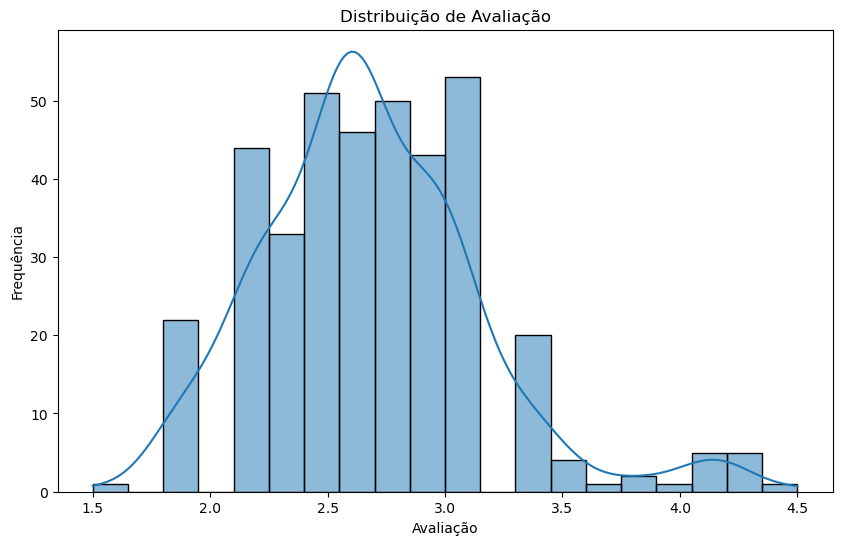

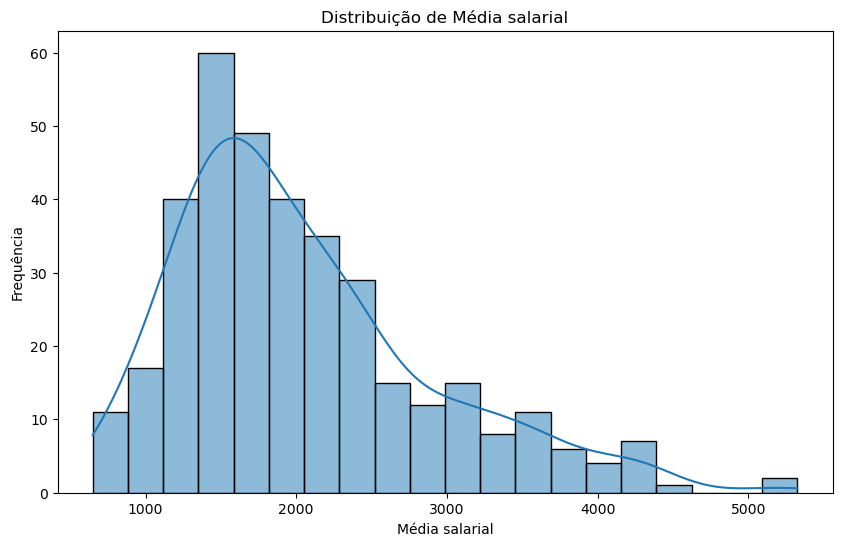

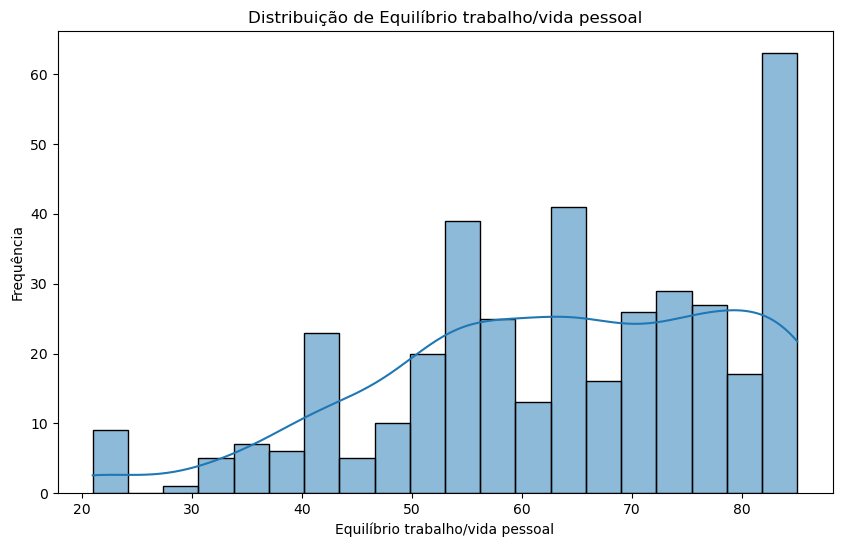

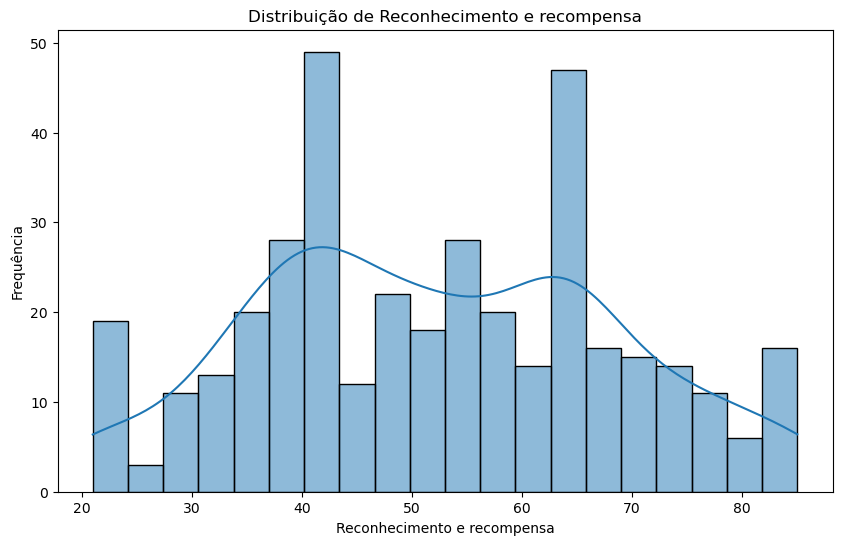

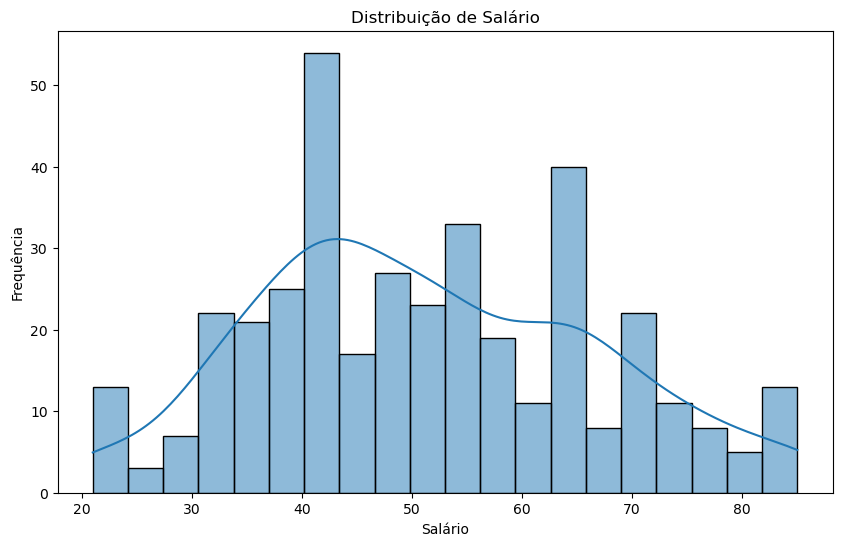

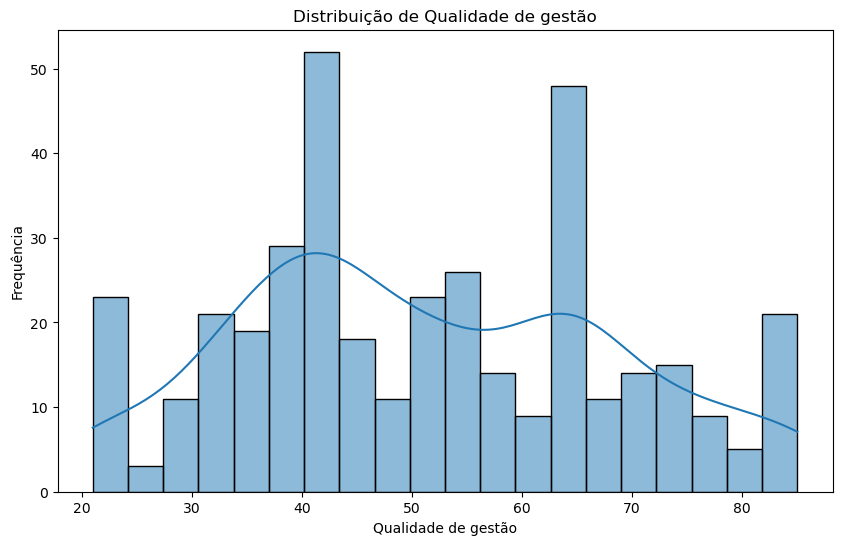

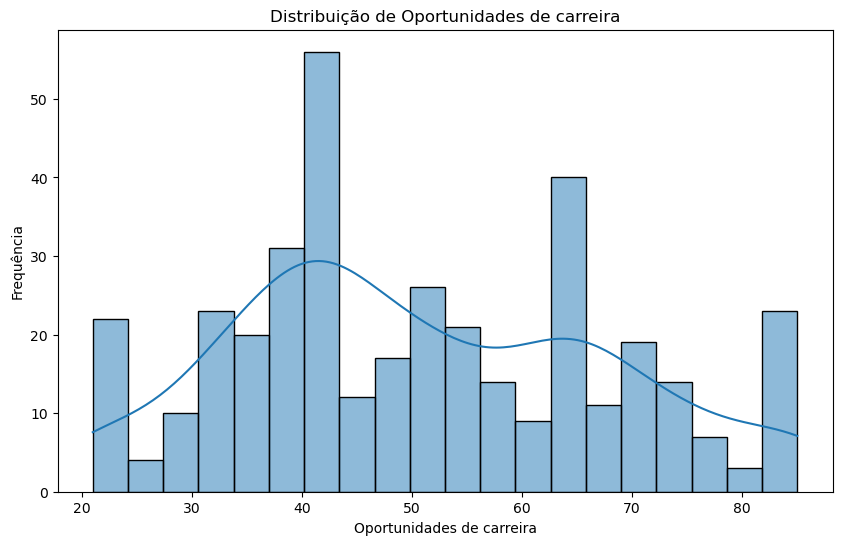

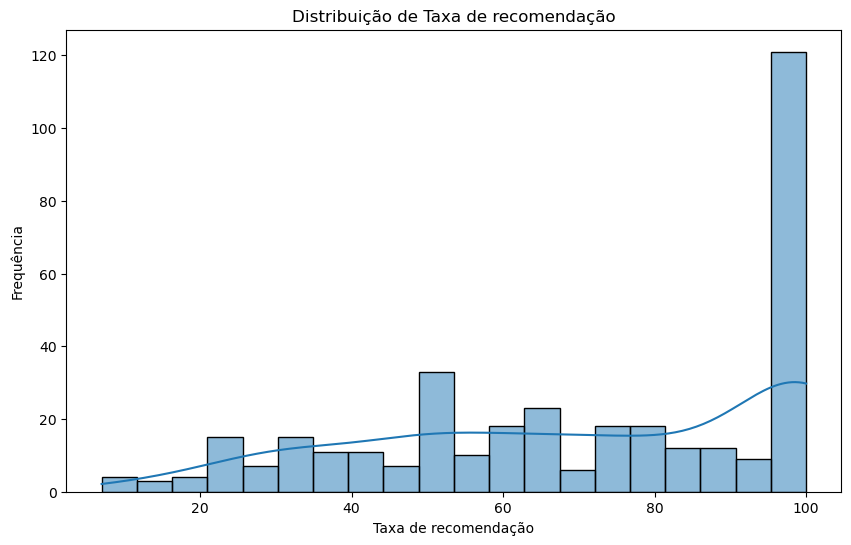

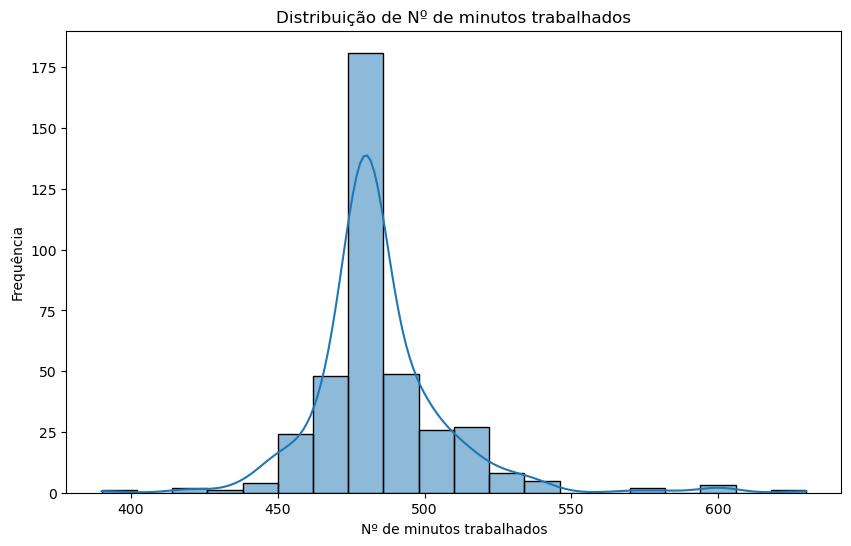

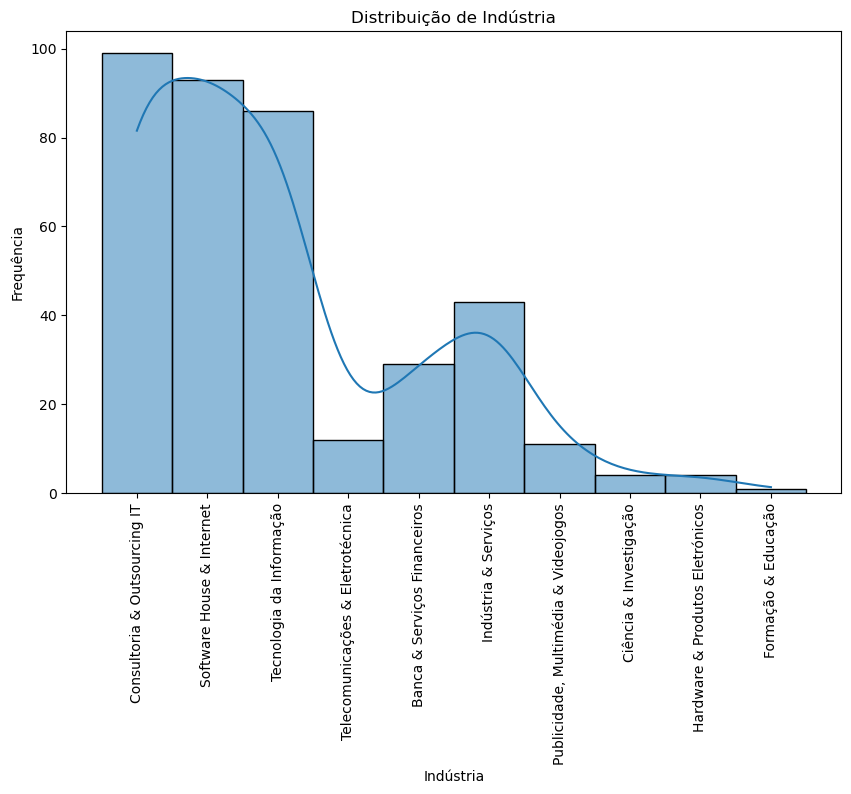

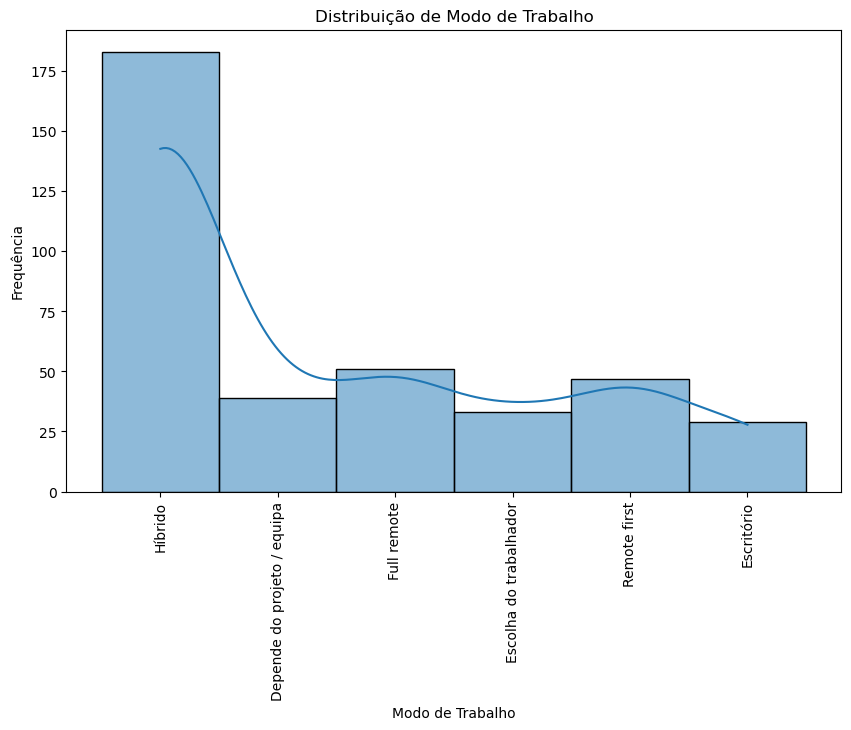

In [22]:
relevant_columns.pop()
for field in relevant_columns + ['Nº de minutos trabalhados']:
    plot_distribution(field, df)
plot_distribution('Indústria', df, 90)
plot_distribution('Modo de Trabalho', df, 90)

Nestes histogramas podemos comprar o modo de distribuição das avaliações específicas. Conseguimos também verificar que existe um número reduzido de pessoas que apresentam o salário superior a 5000€

A função plot_scatter cria um gráfico de dispersão para visualizar a relação entre duas variáveis, nesta função podemos visualizar graficamente a correlação entre duas variáveis.

In [23]:
def plot_scatter(x, y, df):
    data = df[[x, y]].dropna()
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(f'{y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

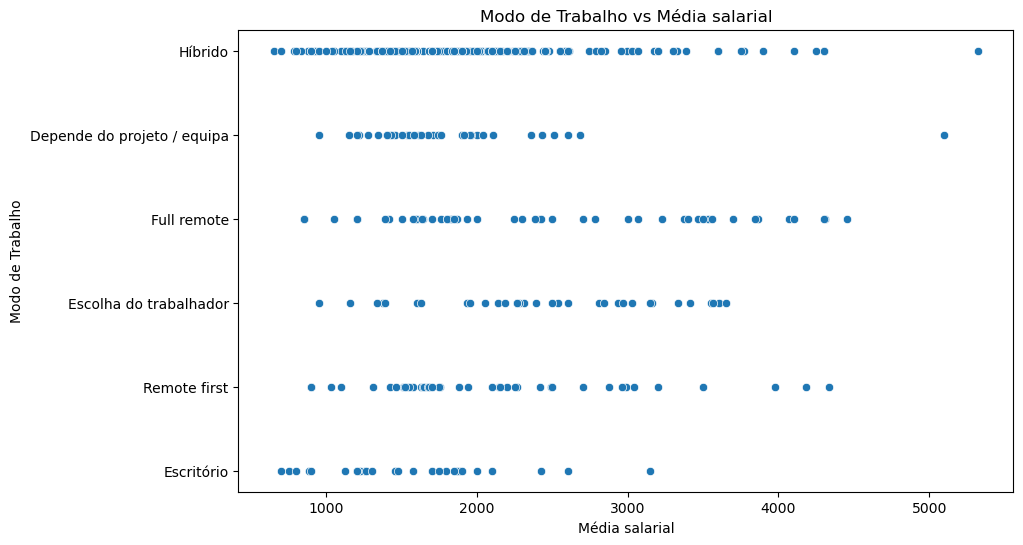

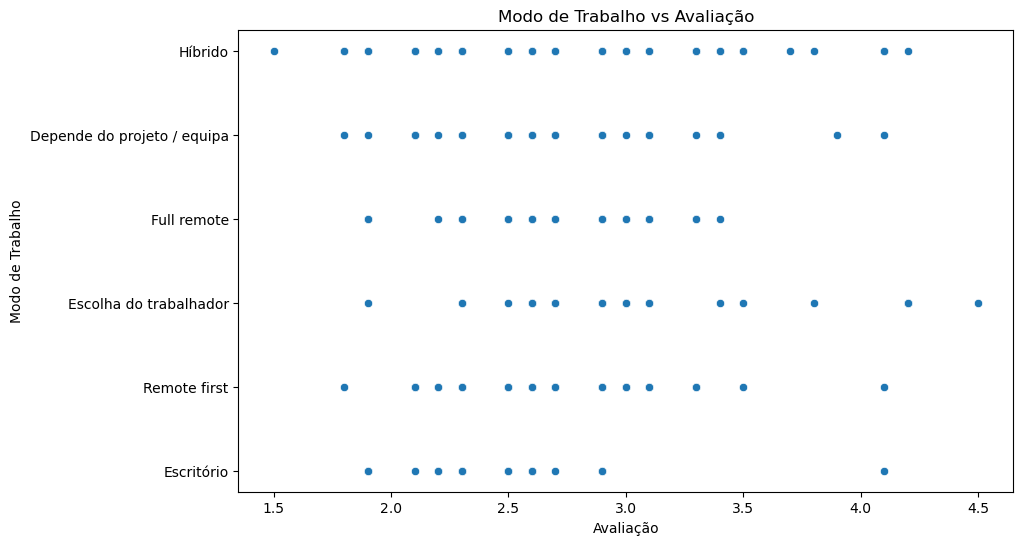

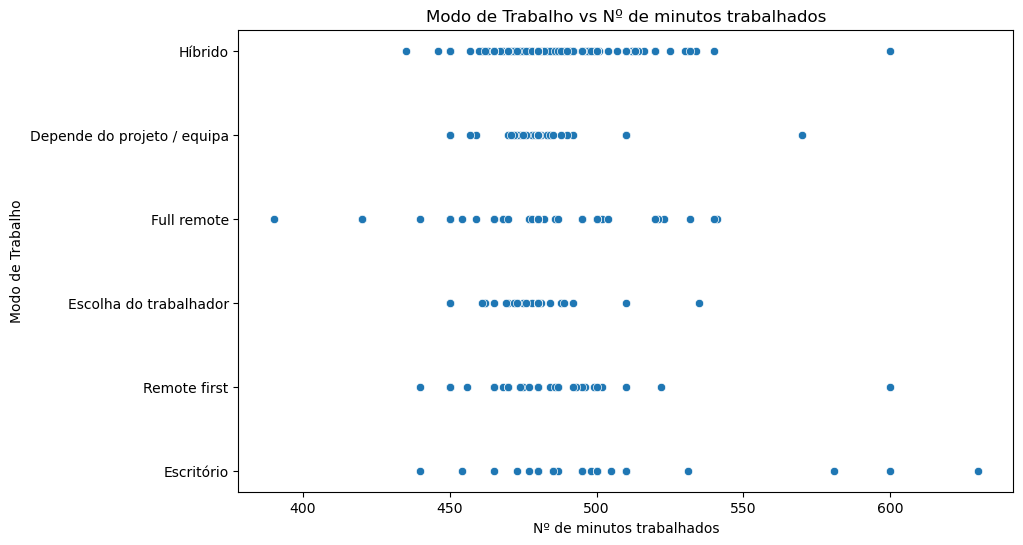

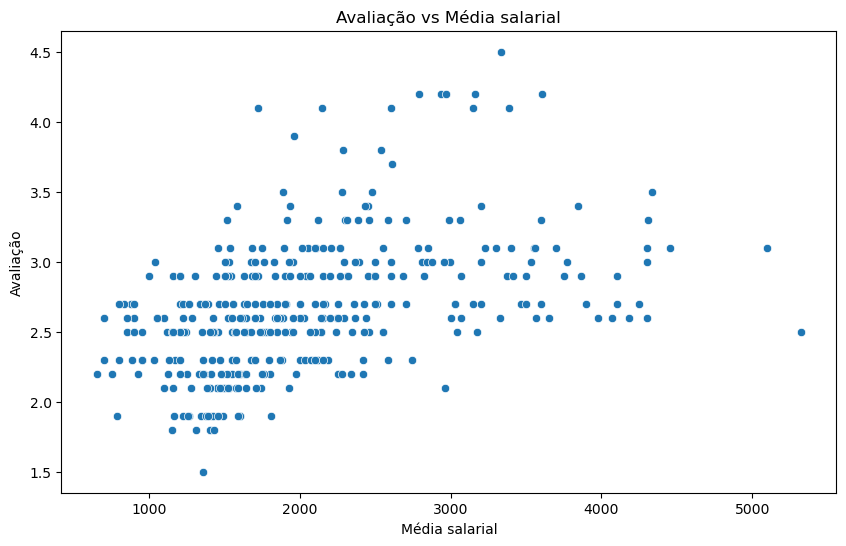

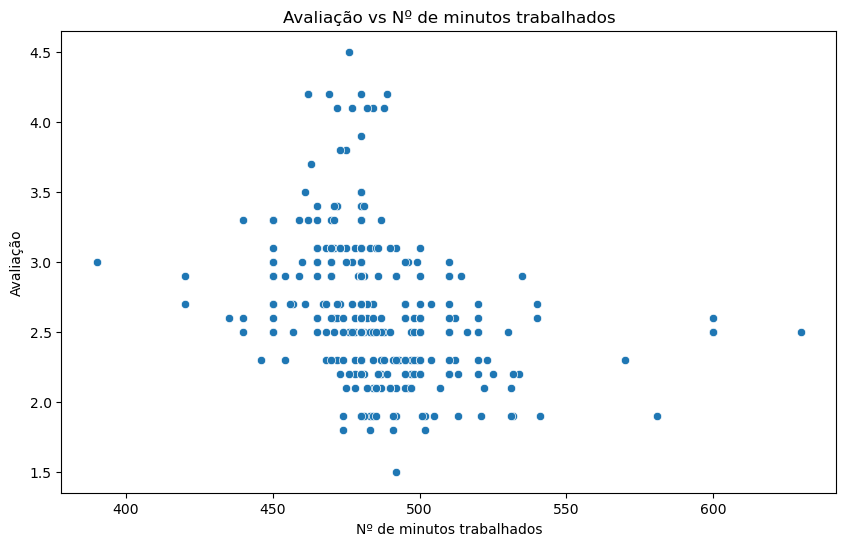

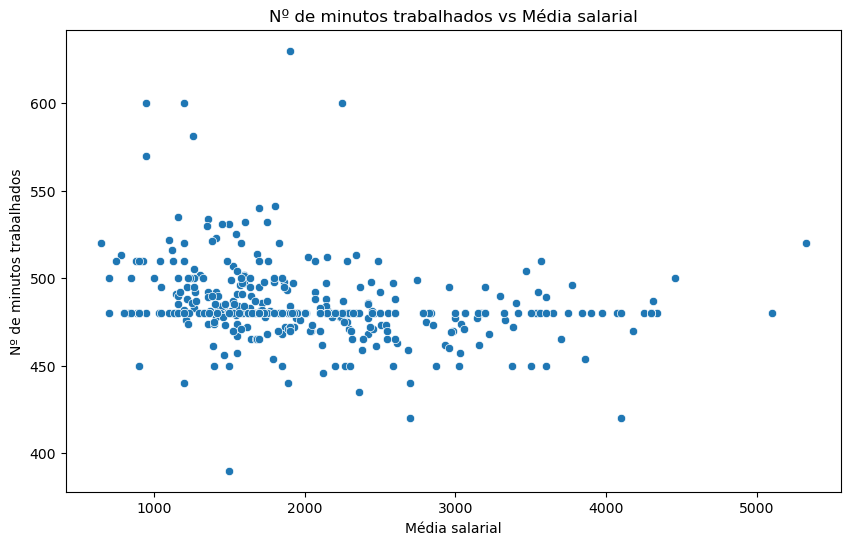

In [24]:
plot_scatter(x='Média salarial', y='Modo de Trabalho', df=df)
plot_scatter(x='Avaliação', y='Modo de Trabalho', df=df)
plot_scatter(x='Nº de minutos trabalhados', y='Modo de Trabalho', df=df)
plot_scatter(x='Média salarial', y='Avaliação', df=df)
plot_scatter(x='Nº de minutos trabalhados', y='Avaliação', df=df)
plot_scatter(x='Média salarial', y='Nº de minutos trabalhados', df=df)

Nos gráfico de dispersão mostrados acima podemos tirar várias conclusões. 
- Comparando a média salarial com o modo de trabalho descobrimos que a o outliers descoberto na média salarial pertece ao modo híbrido, mas em geral diríamos que modo remoto apresenta uma média salarial mais consistente.
- Comparando o modo de trabalho com a avaliação concluímos que em quando da-mos a escolha ao trabalhador ele fica mais satisfeito.
- Comparando a média salarial com a avaliação concluímos realmente existe uma relação entre a satisfação das pessoas com o dinheiro que recebem no entanto esperavamos que este relação fosse mais notada.
- Nos restantes gráficos de dispersão não encontramos relação.


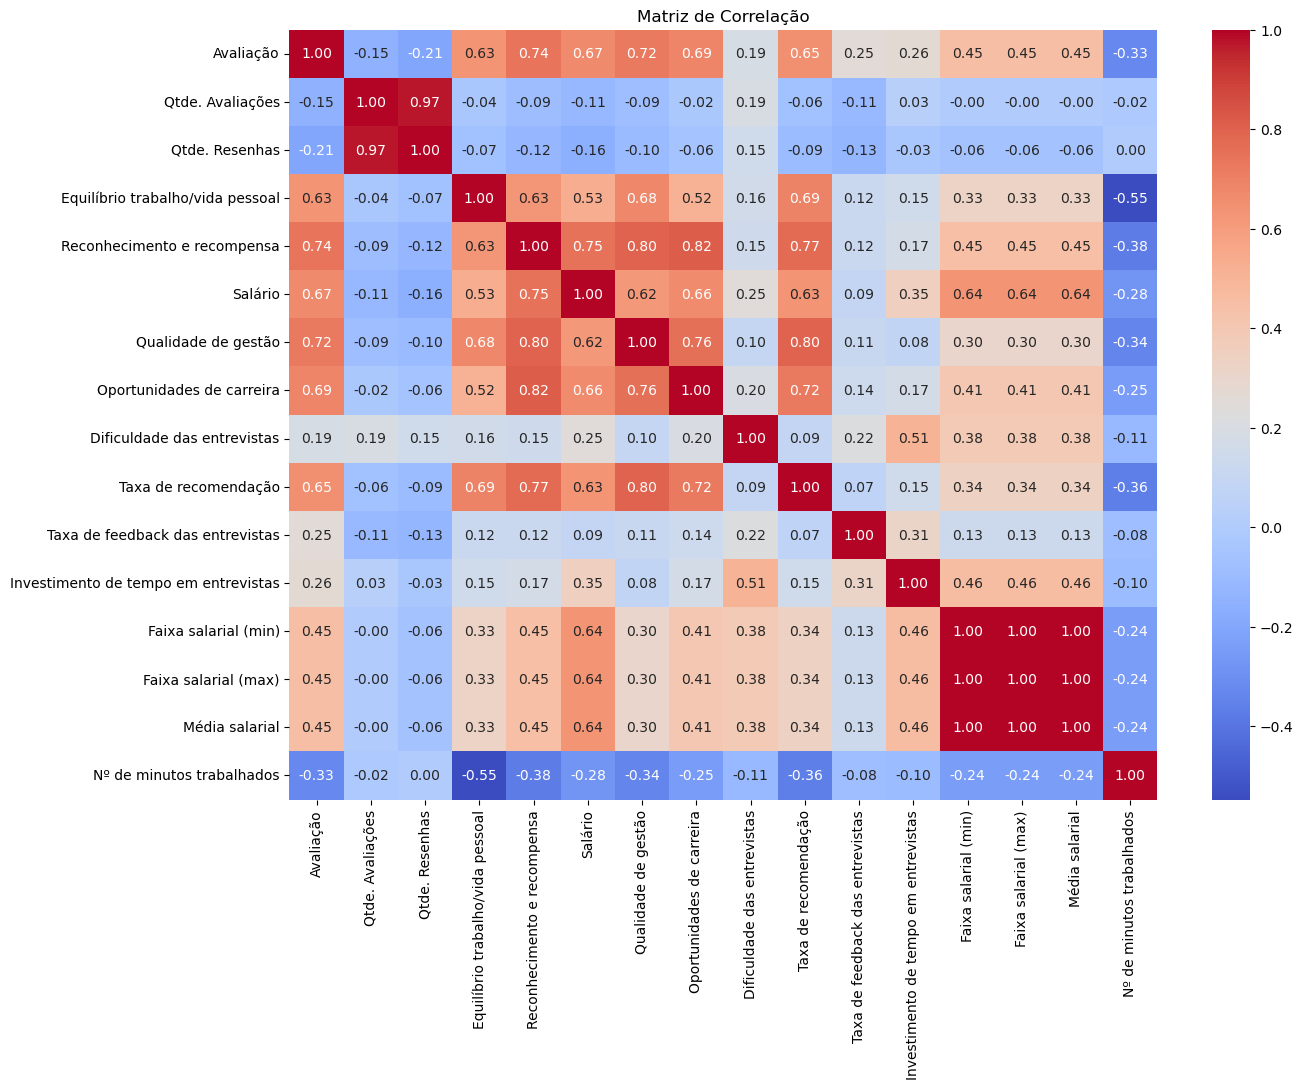

In [25]:
# Matriz de correlação
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

Na presente matrix de confusão concluimos que nos dados retirados do teamlyzerno os pesos que tem mais impacto na avaliação é o reconhecimento e recompensa e a Qualidade de gestão, sendo que as restantes avaliações especificas também apresentam elevado grau de correlação.

# Machine Learning

In [26]:
df = pd.read_csv('teamlyzer_transformed.csv')

relevant_columns = [
    'Avaliação', 'Taxa de recomendação', 'Taxa de feedback das entrevistas',
    'Investimento de tempo em entrevistas', 'Equilíbrio trabalho/vida pessoal',
    'Reconhecimento e recompensa', 'Salário', 'Qualidade de gestão', 'Oportunidades de carreira',
    'Dificuldade das entrevistas', 'Nº de minutos trabalhados', 'Indústria', 'Modo de Trabalho']

target_columns = ['Média salarial', 'Faixa salarial (min)', 'Faixa salarial (max)']
id_columns = ['Nome', 'Website']

# Separate the data into rows with and without missing target values
df_filled = df.dropna(subset=id_columns + target_columns)
df_missing = df[df[target_columns].isnull().any(axis=1)]
df_missing = df_missing.dropna(subset=id_columns)

encoder = LabelEncoder()
for field in ['Indústria', 'Modo de Trabalho']:
    df_filled[field] = encoder.fit_transform(df_filled[field])
    df_missing[field] = encoder.fit_transform(df_missing[field])

X_filled = df_filled[relevant_columns]
y_filled = df_filled[target_columns]

X_filled.fillna(X_filled.mean(), inplace=True)

# Preprocessing pipeline for numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), relevant_columns)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Train models for each target column
models = {}
for target in target_columns:
    model_pipeline.fit(X_filled, y_filled[target])
    models[target] = model_pipeline

# Predict and fill missing values row by row
for index, row in df.iterrows():
    df.loc[index, 'Predicted'] = False
for index, row in df_missing.iterrows():
    for target in target_columns:
        if pd.isnull(row[target]):
            X_missing = row[relevant_columns].values.reshape(1, -1)
            X_missing = pd.DataFrame(X_missing, columns=relevant_columns)
            X_missing.fillna(X_filled.mean(), inplace=True)
            predicted_value = models[target].predict(X_missing)[0]
            df.loc[index, target] = predicted_value
            df.loc[index, 'Predicted'] = True
            
df.to_csv('teamlyzer_transformed_filled.csv', index=False)
print(f'\nSalários estimados para {len(df_missing)} empresas:\n')
print(df.loc[df_missing.index][id_columns + target_columns].to_markdown())


print('\nRanking por Média salarial (incluíndo salários estimados)\n')
print(df.sort_values(by=['Média salarial', 'Avaliação'], ascending=[False, False])[['Nome', 'Website', 'Média salarial', 'Predicted']].head(20).to_markdown())

C:\Users\lucas.rocha\AppData\Local\Temp\ipykernel_82936\1863760861.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled[field] = encoder.fit_transform(df_filled[field])
C:\Users\lucas.rocha\AppData\Local\Temp\ipykernel_82936\1863760861.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filled.fillna(X_filled.mean(), inplace=True)



Salários estimados para 20 empresas:

|     | Nome                             | Website                            |   Média salarial |   Faixa salarial (min) |   Faixa salarial (max) |
|----:|:---------------------------------|:-----------------------------------|-----------------:|-----------------------:|-----------------------:|
| 198 | Think Attitude                   | https://thinkattitude.pt/          |          2128.18 |                2128.18 |                2128.18 |
| 202 | Loka, Inc.                       | https://www.loka.com/              |          2081.3  |                2081.3  |                2081.3  |
| 237 | Passio                           | https://www.passio-consulting.com/ |          1911.39 |                1911.39 |                1911.39 |
| 286 | Xerox Portugal                   | http://www.xerox.com               |          1967.72 |                1967.72 |                1967.72 |
| 292 | Remote                           | https://www.remote.com  

# Model Evaluation

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_filled, y_filled, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate the model and calculate metrics using k-fold cross-validation
def evaluate_model_kfold(X, y, model_pipeline, kf):
    metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': [], 'MAPE': []}
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_pred)
        mape = mean_absolute_percentage_error(y_val, y_pred)
        metrics['MAE'].append(mae)
        metrics['MSE'].append(mse)
        metrics['RMSE'].append(rmse)
        metrics['R2'].append(r2)
        metrics['MAPE'].append(mape)
    for metric in metrics:
        metrics[metric] = np.mean(metrics[metric])
    return metrics

# Train and evaluate the model for each target variable using k-fold cross-validation
results = {}
for target in target_columns:
    metrics = evaluate_model_kfold(X_filled, y_filled[target], model_pipeline, kf)
    results[target] = metrics

evaluation_metrics_df = pd.DataFrame(results).T
print(evaluation_metrics_df.to_markdown())

|                      |     MAE |    MSE |    RMSE |       R2 |     MAPE |
|:---------------------|--------:|-------:|--------:|---------:|---------:|
| Média salarial       | 483.883 | 459062 | 671.976 | 0.35723  | 0.256861 |
| Faixa salarial (min) | 484.032 | 460337 | 672.762 | 0.355054 | 0.275532 |
| Faixa salarial (max) | 482.991 | 458329 | 671.49  | 0.357118 | 0.240464 |


## Explanation of Metrics

### Mean Absolute Error (MAE)
- **Definition:** The average of the absolute differences between the predicted values and the actual values.
- **Interpretation:** It gives an idea of how far off the predictions are from the actual values on average.
- **Formula:** 
  \[
  $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$
  \]

### Mean Squared Error (MSE)
- **Definition:** The average of the squared differences between the predicted values and the actual values.
- **Interpretation:** It gives more weight to larger errors. It's useful when you want to penalize larger errors more than smaller ones.
- **Formula:** 
  \[
  $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
  \]

### Root Mean Squared Error (RMSE)
- **Definition:** The square root of the average of the squared differences between the predicted values and the actual values.
- **Interpretation:** It is in the same units as the target variable and gives a sense of how far off the predictions are from the actual values.
- **Formula:** 
  \[
  $$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$
  \]

## Additional Metrics for Regression

### R-squared (R²)
- **Definition:** A statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
- **Interpretation:** It provides an indication of goodness of fit and ranges from 0 to 1 (or can be negative for models that fit worse than a horizontal line).
- **Formula:** 
  \[
  $$ \text{R}^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$
  \]

### Mean Absolute Percentage Error (MAPE)
- **Definition:** The average of the absolute percentage errors between the predicted values and the actual values.
- **Interpretation:** It expresses the error as a percentage and is useful for understanding the relative error size.
- **Formula:** 
  \[
  $$ text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| $$
  \]

# Retrieval Augmented Generation

In [28]:
def format_company_info(row):
    return (
        f"Nome: {row['Nome']}\n"
        f"Website: {row['URL']}\n"
        f"Avaliação: {row['Avaliação']}\n"
        f"Modo de Trabalho: {row.get('Modo de Trabalho', 'N/A')}\n"
        f"Equilíbrio Trabalho/Vida Pessoal: {row.get('Equilíbrio trabalho/vida pessoal', 'N/A')}\n"
        f"Oportunidades de Carreira: {row.get('Oportunidades de carreira', 'N/A')}\n"
        f"Modo de Trabalho: {row.get('Modo de Trabalho', 'N/A')}\n"
        f"Média Salarial: {row['Média salarial']}\n"
    )

df = pd.read_csv('teamlyzer_transformed_filled.csv')
# Configuração da API Key do OpenAI

load_dotenv()  # take environment variables
openai.api_key = os.getenv('OPENAI_API_KEY')

# Select the relevant columns
df = df[['Nome', 'URL', 'Avaliação', 'Média salarial',
    'Modo de Trabalho', 'Faixa salarial (min)', 'Faixa salarial (max)',
    'Equilíbrio trabalho/vida pessoal', 'Oportunidades de carreira'
]].replace('-', pd.NA).dropna().sort_values(
    by=['Média salarial', 'Equilíbrio trabalho/vida pessoal', 'Avaliação'],
    ascending=[False, False, False])

df['Formatted_Info'] = df.apply(format_company_info, axis=1)
informacoes_empresas = "\n\n".join(df['Formatted_Info'].tolist())

def gerar_resposta_completa(pergunta, informacoes):
    # Usar a API do OpenAI para gerar uma resposta baseada nas informações fornecidas
    response = openai.ChatCompletion.create(
        #model="gpt-3.5-turbo",
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "Você é um consultor de carreiras para profissionais de TI em Portugal. Use as seguintes informações para responder à pergunta do usuário."},
            {"role": "user", "content": pergunta},
            {"role": "assistant", "content": informacoes}
        ],
        max_tokens=2000  
    )
    return response['choices'][0]['message']['content'].strip()

def responder_pergunta(pergunta):
    resposta = gerar_resposta_completa(pergunta, informacoes_empresas)
    return resposta

pergunta_exemplo = "Faça um top 20 melhores empresas para trabalhar em Portugal considerando: Média Salarial, Avaliação, Equilíbrio Trabalho/Vida Pessoal, Oportunidades de Carreira e Modo de Trabalho."
resposta = responder_pergunta(pergunta_exemplo)
print(resposta)

Aqui está a lista das 20 melhores empresas para trabalhar em Portugal, considerando os critérios fornecidos: Média Salarial, Avaliação, Equilíbrio Trabalho/Vida Pessoal, Oportunidades de Carreira e Modo de Trabalho. Essas empresas foram escolhidas pela combinação desses critérios, sendo que algumas podem se destacar mais em certos aspectos do que em outros.

1. **FRVR**
   - Média Salarial: 5325.0
   - Avaliação: 2.5
   - Equilíbrio Trabalho/Vida Pessoal: 35
   - Oportunidades de Carreira: 35
   - Modo de Trabalho: Híbrido

2. **Singlestore**
   - Média Salarial: 5100.0
   - Avaliação: 3.1
   - Equilíbrio Trabalho/Vida Pessoal: 64
   - Oportunidades de Carreira: 85
   - Modo de Trabalho: Depende do projeto / equipa

3. **Revolut**
   - Média Salarial: 4457.0
   - Avaliação: 3.1
   - Equilíbrio Trabalho/Vida Pessoal: 71
   - Oportunidades de Carreira: 71
   - Modo de Trabalho: Full remote

4. **Tripadvisor**
   - Média Salarial: 4338.0
   - Avaliação: 3.5
   - Equilíbrio Trabalho/Vida P